In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### EDA

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.shape

(918, 12)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

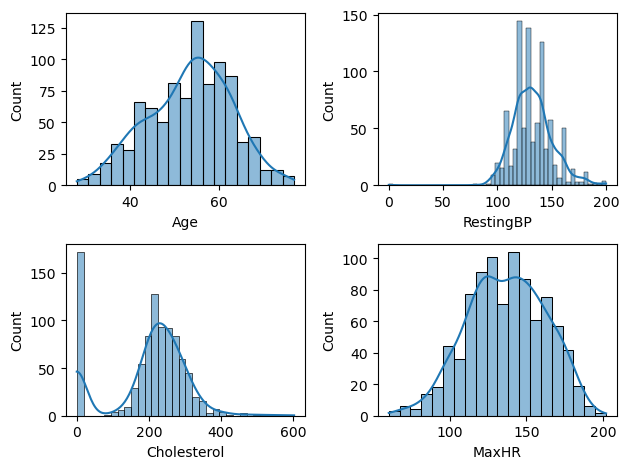

In [ ]:
def plotting (var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plt.tight_layout() # is use for the set layout or remove overlap dat

In [ ]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [ ]:
ch_mean = df.loc[df['Cholesterol']!= 0,'Cholesterol'].mean()

In [ ]:
df['Cholesterol']= df['Cholesterol'].replace(0,ch_mean)    # because 0 cholesterol is not valid for any human
df['Cholesterol'] = df['Cholesterol'].round(2)   # to roundup value


In [ ]:
resting_bp_mean = df.loc[df['RestingBP']!= 0,'RestingBP'].mean()
df['RestingBP']= df['RestingBP'].replace(0,resting_bp_mean)    # because 0 restingbp is not valid for any human
df['RestingBP'] = df['RestingBP'].round(2) 

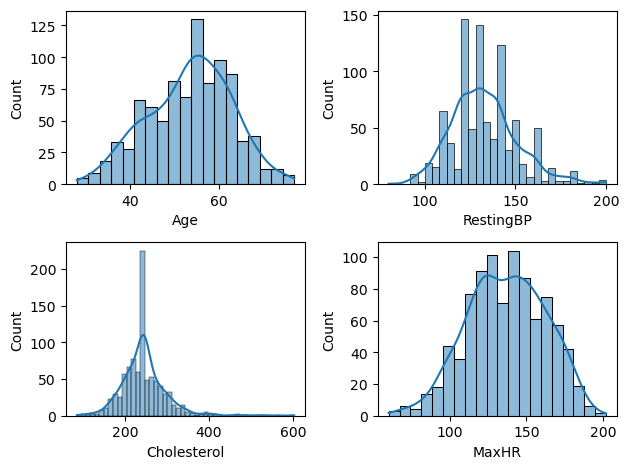

In [ ]:
def plotting (var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plt.tight_layout()   

<Axes: xlabel='Sex', ylabel='count'>

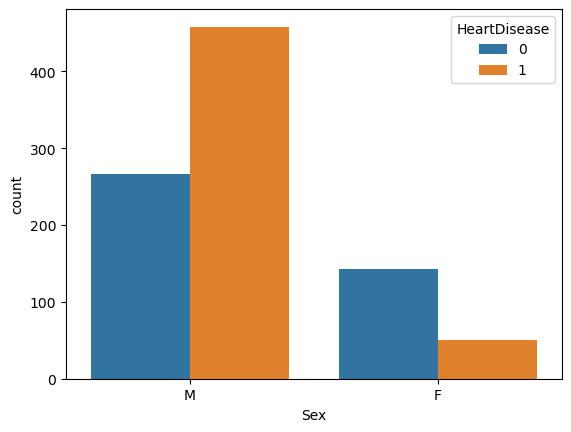

In [ ]:
sns.countplot(x=df['Sex'],hue = df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

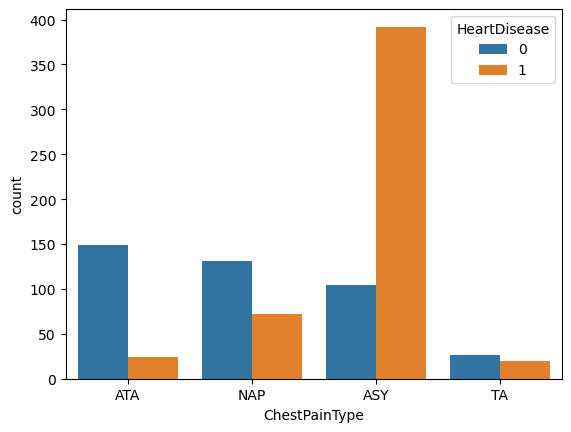

In [ ]:
sns.countplot(x=df['ChestPainType'],hue = df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

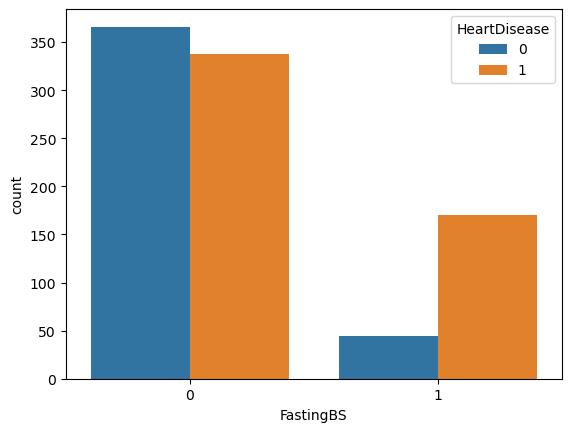

In [ ]:
sns.countplot(x=df['FastingBS'],hue = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

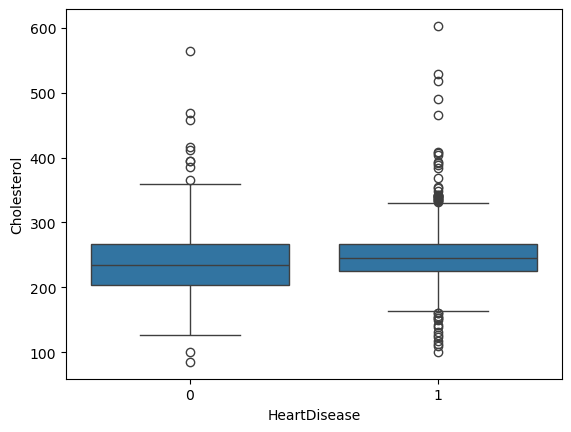

In [ ]:
sns.boxplot(x = 'HeartDisease',y = 'Cholesterol',data =df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

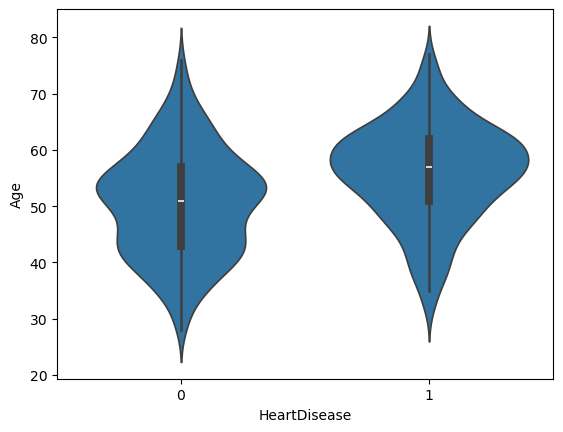

In [ ]:
sns.violinplot(x = 'HeartDisease',y = 'Age',data =df)

<Axes: >

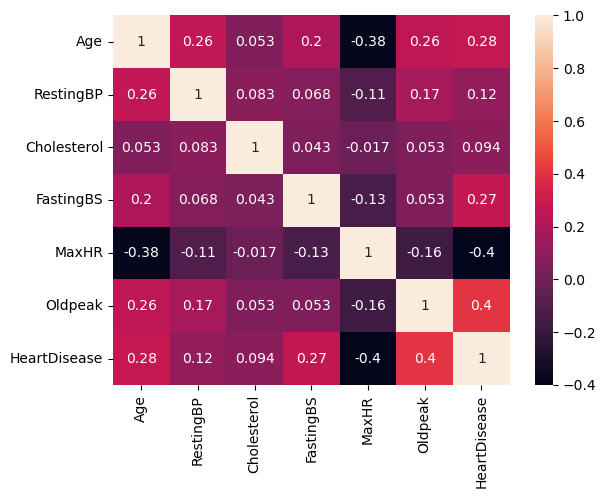

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

### data cleaning and preprocess

In [ ]:
df_encode = pd.get_dummies(df,drop_first =True) # drop first is use for drop fist dummy colum of variable

In [ ]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


part 3

In [ ]:
df_encode_= df_encode.astype(int)

In [ ]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [ ]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
x = df_encode.drop('HeartDisease',axis = 1)
y = df_encode['HeartDisease']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)

In [30]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [31]:
models = {
    "LogisticRegression" :LogisticRegression(),
    "knn" : KNeighborsClassifier(),
     "naive byeas" : GaussianNB(),
    "decision tree" : DecisionTreeClassifier(),
    "svm": SVC()
}

In [32]:
results = []

In [33]:
for name,model in models.items():
    model.fit(x_train_scaled,y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    results.append({
        'model': name,
        'Accuracy': round(acc,4),
        'F1 score': round(f1,4)
    })

In [34]:
results

[{'model': 'LogisticRegression', 'Accuracy': 0.8641, 'F1 score': 0.8804},
 {'model': 'knn', 'Accuracy': 0.8533, 'F1 score': 0.8708},
 {'model': 'naive byeas', 'Accuracy': 0.8533, 'F1 score': 0.8683},
 {'model': 'decision tree', 'Accuracy': 0.7772, 'F1 score': 0.8019},
 {'model': 'svm', 'Accuracy': 0.8478, 'F1 score': 0.8679}]

In [35]:
import joblib          
joblib.dump(models['knn'],'KNN_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(x.columns.tolist(),'column.pkl')   # pickie use for save model as pickle file then we use it
                                               # it's covrt our code into binary and then save as file

['column.pkl']